In [55]:
from time import sleep
from datetime import datetime, time, timedelta
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
os.chdir("/home/cl/google drive/goldbug")
os.listdir()

['GC TICK_ALL 20180829 to 20181026',
 'GC 1 min 20111021 to 20181026',
 'GC 5 secs 20180731 to 20181026']

In [78]:
df = pd.read_pickle('GC 5 secs 20180731 to 20181026')
df.index = df.index.tz_localize(tz = 'America/New_York').tz_convert(tz = 'Europe/London')

In [82]:
pre = df.between_time('14:55:00', '15:00:00').groupby(pd.Grouper(freq='D')).max()
post = df.between_time('15:00:00', '15:15:00').groupby(pd.Grouper(freq='D')).min()

In [83]:
data = pd.concat([pre, post], axis = 1).dropna()
data.columns = ['pre', 'post']
data['ret'] = (data['pre'] - data['post'])/data['pre']
data['ret_dollar'] = (data['pre'] - data['post'])

In [84]:
data['ret'].mean() / data['ret'].std()

1.252419370606158

In [85]:
data['ret'].mean()

0.0011616476229947853

In [87]:
data['ret_dollar'].sum()

88.60000000000014

In [88]:
df = pd.read_hdf('GC 1 min 20111021 to 20181026', 'df')
df.index = df.index.tz_localize(tz = 'America/New_York').tz_convert(tz = 'Europe/London')
df.head()

,close
date,
2011-10-21 14:30:00+01:00,1793.0
2011-10-21 14:31:00+01:00,1792.0
2011-10-21 14:32:00+01:00,1794.0
2011-10-21 14:33:00+01:00,1795.0
2011-10-21 14:34:00+01:00,1797.0


In [90]:
pre = df.between_time('14:55:00', '15:00:00', include_end = False).groupby(pd.Grouper(freq = 'D')).max()
post = df.between_time('15:00:00', '15:15:00').groupby(pd.Grouper(freq = 'D')).min()

In [98]:
data = pd.concat([pre, post], axis = 1).dropna()
data.columns = ['pre', 'post']
data['ret'] = (data['pre'] - data['post'])/data['pre']
data['ret_dollar'] = (data['pre'] - data['post']) * 100

In [99]:
data.groupby(pd.Grouper(freq = 'Y')).mean() / data.groupby(pd.Grouper(freq = 'Y')).std()

,pre,post,ret,ret_dollar
date,,,,
2011-12-31 00:00:00+00:00,22.976932,22.712759,1.019248,1.038413
2012-12-31 00:00:00+00:00,26.032454,26.000690,0.818884,0.821406
2013-12-31 00:00:00+00:00,8.957752,8.932147,0.712671,0.723431
2014-12-31 00:00:00+00:00,21.317516,21.256278,1.127499,1.129996
2015-12-31 00:00:00+00:00,18.601900,18.641485,0.921517,0.911328
2016-12-31 00:00:00+00:00,16.415480,16.408708,0.906978,0.904776
2017-12-31 00:00:00+00:00,34.766135,34.637130,0.929134,0.939292
2018-12-31 00:00:00+00:00,21.146331,21.136127,1.012037,1.019801


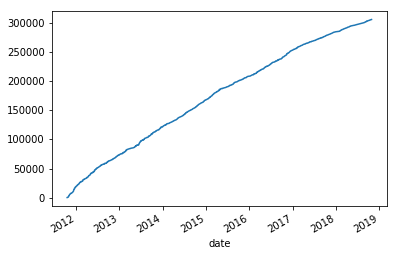

In [103]:
data['ret_dollar'].cumsum().plot()